# Steps

* Reading, understanding and visualising the data
* Preparing data for model
* Training the model
* Residual analysis
* Making predictions using the final model
* Model evaluation on test set

# Step 1 - Reading understanding and visualising the data

In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy as sp
import statsmodels.api as sm
import statsmodels.tsa.api as smt

%matplotlib inline

In [2]:
# To suppress the warnings
# Commenting for the time being, so see and learn about potential deprecated warning
import warnings
#warnings.filterwarnings('ignore')

In [3]:
# Read the data

boom_bikes_df = pd.read_csv("day.csv", low_memory=False)

In [4]:
# Checking the shape of rows and columns

boom_bikes_df.shape

(730, 16)

In [5]:
# Check the datatyps for each columns in dataset

boom_bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Interpretation -

* There are 16 columns and 730 rows in the dataset
* Most of the columns are of integer and float type
* It looks like, that dataset doesn't contain null values (although I will confirm it in next step)


# EDA (Exploratory Data Analysis)

In [6]:
# Check for null or missing values

boom_bikes_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Interpretation
* There is no null or missing values in the dataset

In [7]:
# Summary of numerical columns in the dataset

boom_bikes_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# Get all the columns

boom_bikes_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## Data Cleaning

### Dropping the insignificant columns

* `instant` - it is an index column and it doesn't provide any significant information
* `dteday` - it is date column and since there is already `mnth` and `yr` column and no additional information could be extracted from this
* `casual` and `registered` column give `cnt` (which is the target column), no additional information could be extracted from this

In [9]:
# Dropping the columns

columns_to_drop = ['instant', 'casual', 'registered', 'dteday']

boom_bikes_df.drop(columns_to_drop, axis=1, inplace=True)
boom_bikes_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
# Renaming some columns for better understanding the dataset

boom_bikes_df.rename(columns = {'yr':'year','mnth':'month', 'weathersit':'weather', 'atemp':'realfeeltemp', 'hum':'humidity','cnt':'count'}, inplace = True) 
boom_bikes_df.head()

,season,year,month,holiday,weekday,workingday,weather,temp,realfeeltemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Mapping the categorical variables

In [11]:
# Mapping the categorical variable

boom_bikes_df['season'] = boom_bikes_df.season.map({1: 'spring', 2: 'summer', 3:'fall', 4:'winter'})
boom_bikes_df['month'] = boom_bikes_df.month.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
boom_bikes_df['weather'] = boom_bikes_df.weather.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist'})
boom_bikes_df['weekday'] = boom_bikes_df.weekday.map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})

boom_bikes_df.head()

,season,year,month,holiday,weekday,workingday,weather,temp,realfeeltemp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Count the unique values

In [12]:
boom_bikes_df.nunique().sort_values()

year              2
holiday           2
workingday        2
weather           3
season            4
weekday           7
month            12
temp            498
humidity        594
windspeed       649
realfeeltemp    689
count           695
dtype: int64

### Check for outliers

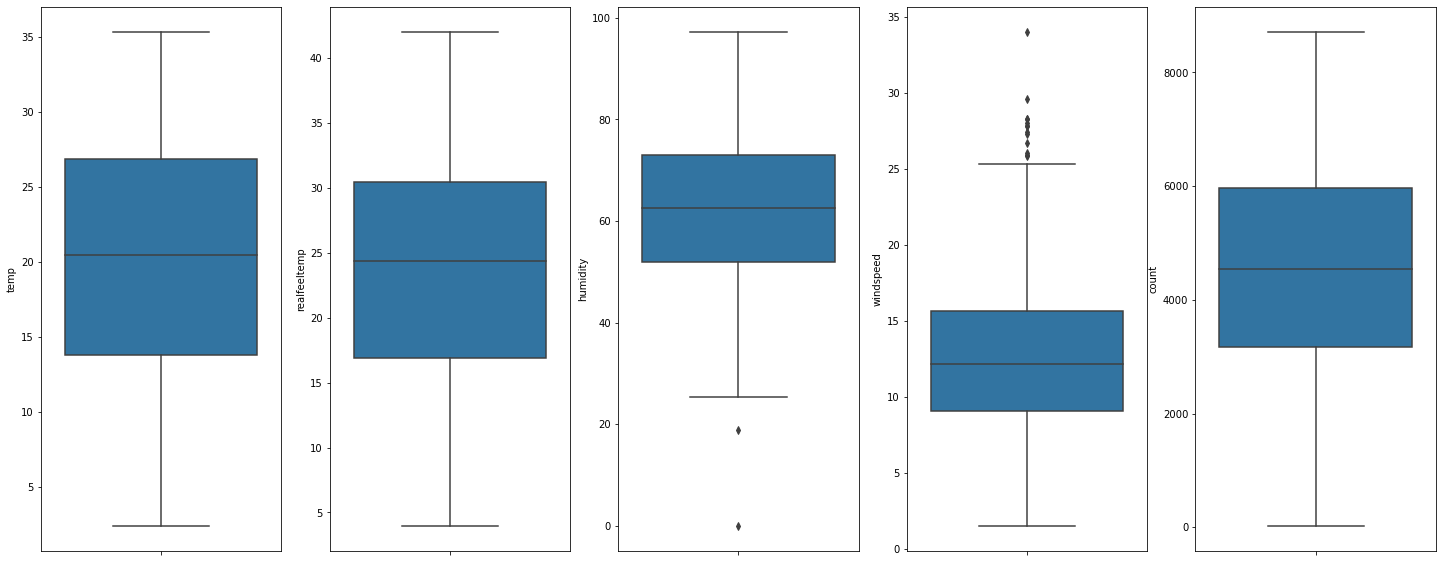

In [13]:
# Analysing variables for outliers using box plot

plt.figure(figsize=(25, 10))
plt.subplot(1,5,1)
sns.boxplot(  y = 'temp', data = boom_bikes_df)
plt.subplot(1,5,2)
sns.boxplot( y = 'realfeeltemp', data = boom_bikes_df)
plt.subplot(1,5,3)
sns.boxplot(y = 'humidity', data = boom_bikes_df)
plt.subplot(1,5,4)
sns.boxplot(y = 'windspeed', data = boom_bikes_df)
plt.subplot(1,5,5)
sns.boxplot(y = 'count', data = boom_bikes_df)

plt.show()

* There are outliers in `windspeed` and `humidity` columns, these should be handled

### Outlier hanling for `windspeed`

In [14]:
# Get Mean, Median, Quartile data for windspeed

boom_bikes_df.windspeed.describe()

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

In [15]:
# Get lower and upper bound by IQR method (q3-q1)

q1 = boom_bikes_df.windspeed.describe()["25%"]
q3 = boom_bikes_df.windspeed.describe()["75%"]

iqr = q3 - q1

lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

In [16]:
# Treatment of outlier

boom_bikes_df.windspeed=np.where(boom_bikes_df.windspeed>upper_bound,upper_bound,boom_bikes_df.windspeed)

boom_bikes_df.windspeed=np.where(boom_bikes_df.windspeed<lower_bound,lower_bound,boom_bikes_df.windspeed)

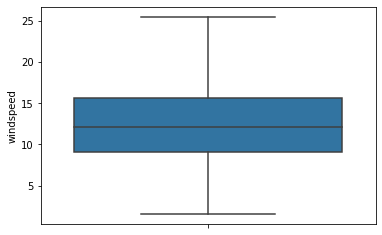

In [17]:
# Re-plot after outlier handling

sns.boxplot(y='windspeed', data=boom_bikes_df)
plt.show()

### Handling the outlier for `humidity` in the same way as `windspeed`

In [18]:
boom_bikes_df.humidity.describe()

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: humidity, dtype: float64

In [19]:
q1 = boom_bikes_df.humidity.describe()["25%"]
q3 = boom_bikes_df.humidity.describe()["75%"]

iqr = q3 - q1

lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

In [20]:
boom_bikes_df.humidity=np.where(boom_bikes_df.humidity>upper_bound,upper_bound,boom_bikes_df.humidity)

boom_bikes_df.humidity=np.where(boom_bikes_df.humidity<lower_bound,lower_bound,boom_bikes_df.humidity)

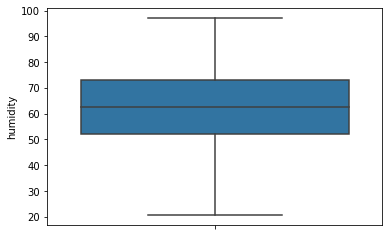

In [21]:
# Re-plot after outlier handling

sns.boxplot(y='humidity', data=boom_bikes_df)
plt.show()

# Data Visualisation

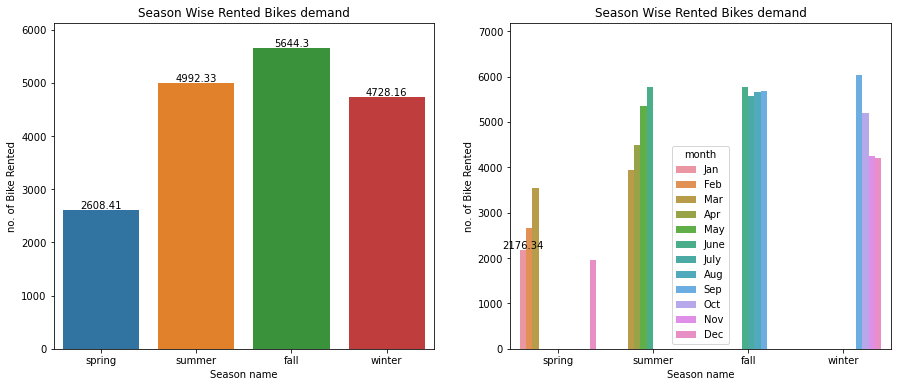

In [22]:
# Season wise effect on rented bikes demand

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax = sns.barplot(x='season', y='count', data=boom_bikes_df, errwidth=0)
ax.bar_label(ax.containers[0])
plt.title('Season Wise Rented Bikes demand')
plt.xlabel('Season name')
plt.ylabel('no. of Bike Rented')

plt.subplot(1,2,2)
ax = sns.barplot(x='season', y='count', hue='month', data=boom_bikes_df, errwidth=0)
ax.bar_label(ax.containers[0])
plt.title('Season Wise Rented Bikes demand')
plt.xlabel('Season name')
plt.ylabel('no. of Bike Rented')
plt.show()

### Interpretation -

* Spring season has least demand, so it can be said that in spring season least people use rented bikes
* Fall season has highest demand

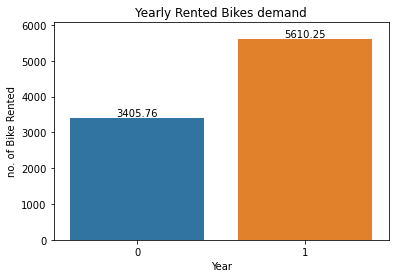

In [23]:
# Year wise effect on rented bikes demand

plt.figure(figsize=(6,4))
ax = sns.barplot(x='year', y='count', data=boom_bikes_df, errwidth=0)
ax.bar_label(ax.containers[0])
plt.title('Yearly Rented Bikes demand')
plt.xlabel('Year')
plt.ylabel('no. of Bike Rented')
plt.show()

### Interpretation -

* Rented bikes demand increased in year 1 (i.e. 2019)

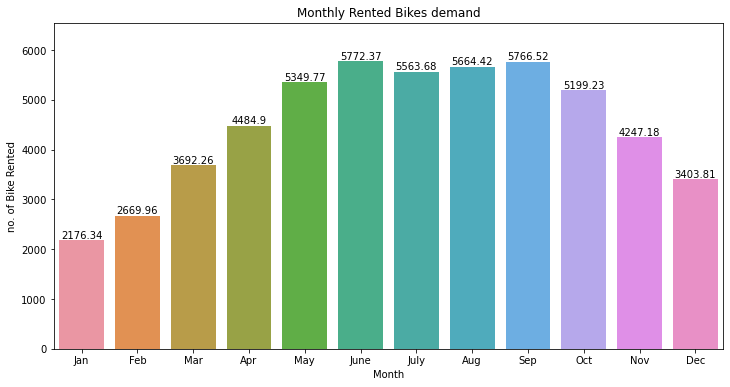

In [24]:
# Month wise effect on rented bikes count

plt.figure(figsize=(12,6))
ax = sns.barplot(x='month', y='count', data=boom_bikes_df, errwidth=0)
ax.bar_label(ax.containers[0])
plt.title('Monthly Rented Bikes demand')
plt.xlabel('Month')
plt.ylabel('no. of Bike Rented')
plt.show()

### Interpretation -

* Almost similar demand of rented bikes from June - Sept
* Least demand during Dec, Jan & Feb
* Management should be prepared for rental supply accoring to demand

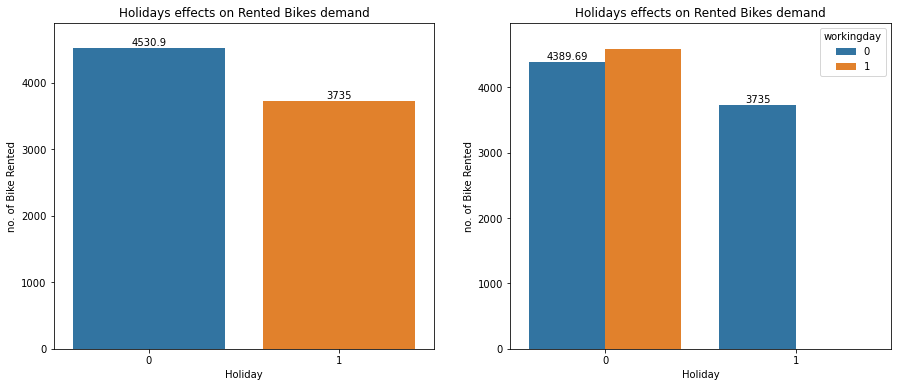

In [25]:
# Effect of holidays on rented bikes demand

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax = sns.barplot(x='holiday', y='count', data=boom_bikes_df, errwidth=0)
ax.bar_label(ax.containers[0])
plt.title('Holidays effects on Rented Bikes demand')
plt.xlabel('Holiday')
plt.ylabel('no. of Bike Rented')

plt.subplot(1,2,2)
ax = sns.barplot(x='holiday', y='count',hue='workingday', data=boom_bikes_df, errwidth=0)
ax.bar_label(ax.containers[0])
plt.title('Holidays effects on Rented Bikes demand')
plt.xlabel('Holiday')
plt.ylabel('no. of Bike Rented')
plt.show()

### Interpretation -

* Demand for rented bikes are less on holidays

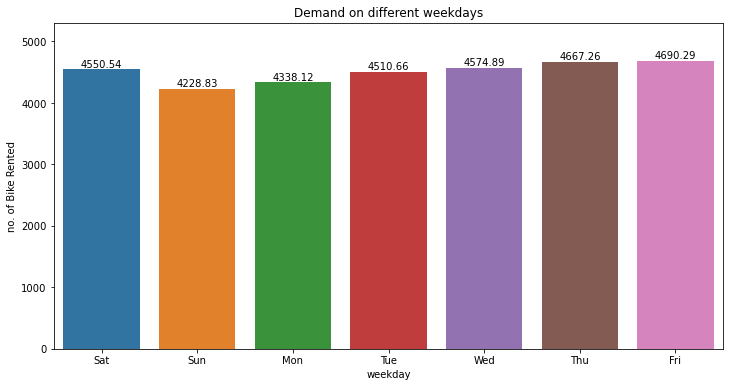

In [26]:
# Effect of Weekdays on demand

plt.figure(figsize=(12,6))
ax = sns.barplot(x='weekday', y='count', data=boom_bikes_df, errwidth=0)
ax.bar_label(ax.containers[0])
plt.title('Demand on different weekdays')
plt.xlabel('weekday')
plt.ylabel('no. of Bike Rented')
plt.show()

### Interpretation

* Demand is least on Sunday (holiday)

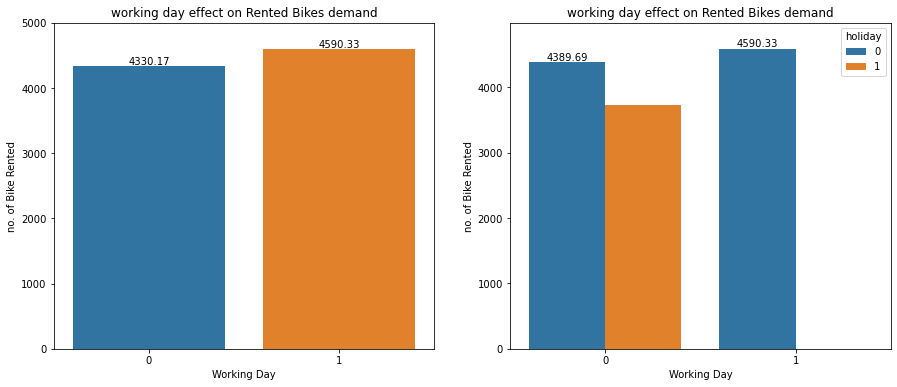

In [27]:
# Workingday wise effect on rented bikes demand

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax = sns.barplot(x='workingday', y='count', data=boom_bikes_df, errwidth=0)
ax.bar_label(ax.containers[0])
plt.title('working day effect on Rented Bikes demand')
plt.xlabel('Working Day')
plt.ylabel('no. of Bike Rented')

plt.subplot(1,2,2)
ax = sns.barplot(x='workingday', y='count',hue='holiday', data=boom_bikes_df, errwidth=0)
ax.bar_label(ax.containers[0])
plt.title('working day effect on Rented Bikes demand')
plt.xlabel('Working Day')
plt.ylabel('no. of Bike Rented')
plt.show()

### Interpretation -

* Demand on working day is slightly higher

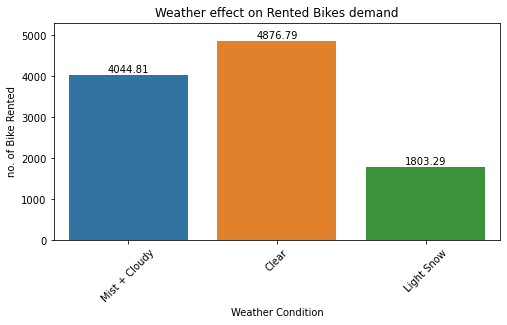

In [28]:
# Weather wise effect on demand

plt.figure(figsize=(8,4))
ax = sns.barplot(x='weather', y='count', data=boom_bikes_df, errwidth=0)
ax.bar_label(ax.containers[0])
plt.title('Weather effect on Rented Bikes demand')
plt.xlabel('Weather Condition')
plt.ylabel('no. of Bike Rented')
plt.xticks(rotation=45)
plt.show()

### Interpretation -

* In clear weather condition the demand is higher
* Demand is least when weather condition is light snow

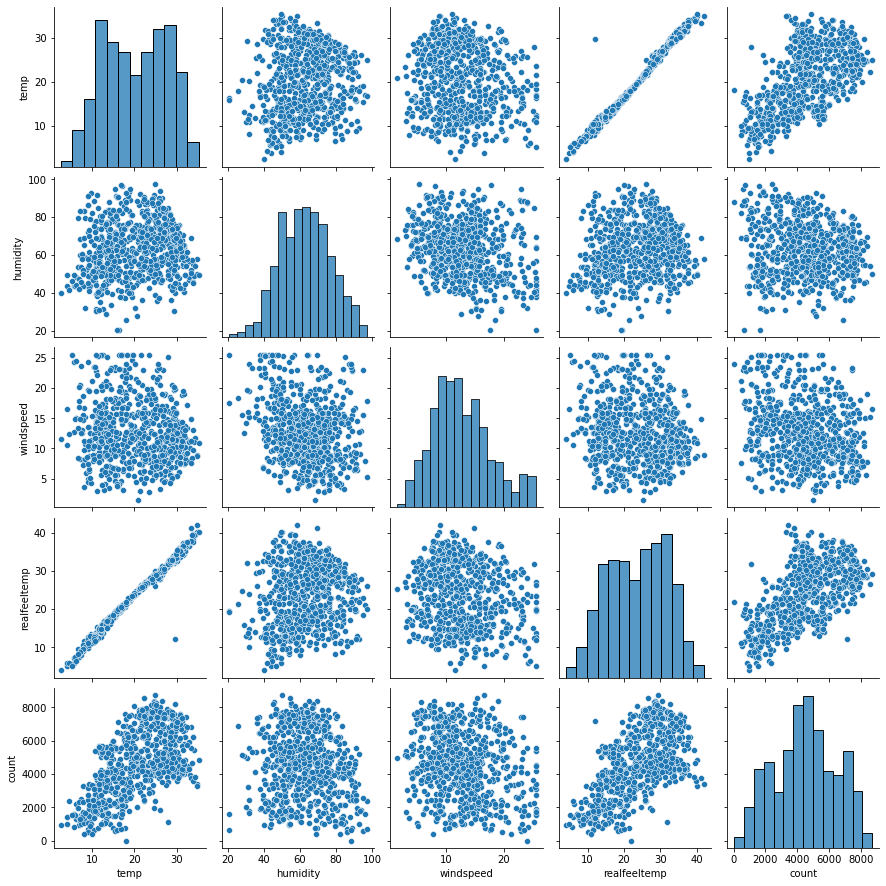

In [29]:
# Pairplot for numerical variables

sns.pairplot(boom_bikes_df, vars=["temp", "humidity", "windspeed", "realfeeltemp", "count"])
plt.show()

### Interpretation -

* There is some linear relation between `temp` and `realfeeltemp` with `count`

* Following independent variables could be good predictors -
 * temp
 * weather
 * months
 * season
 * workingday

<Figure size 1440x1080 with 0 Axes>

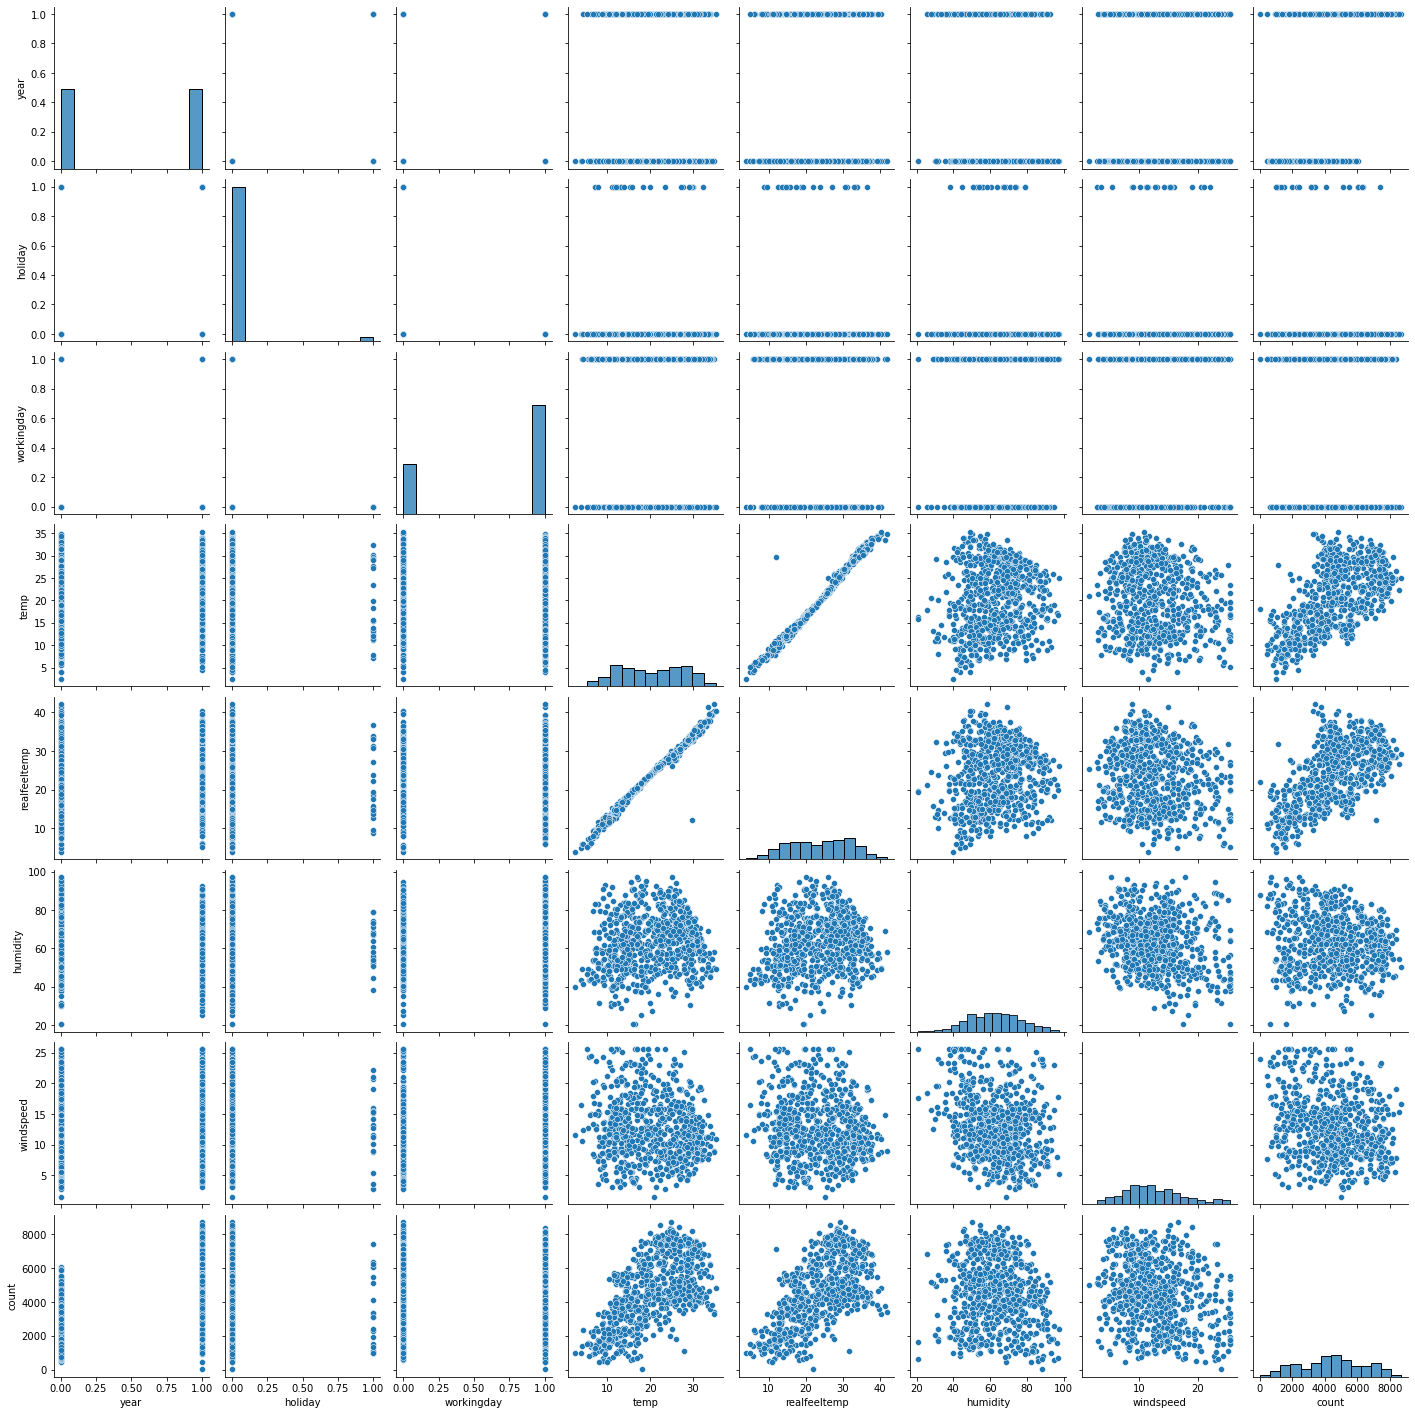

In [30]:
plt.figure(figsize=(20,15))
sns.pairplot(boom_bikes_df)
plt.show()

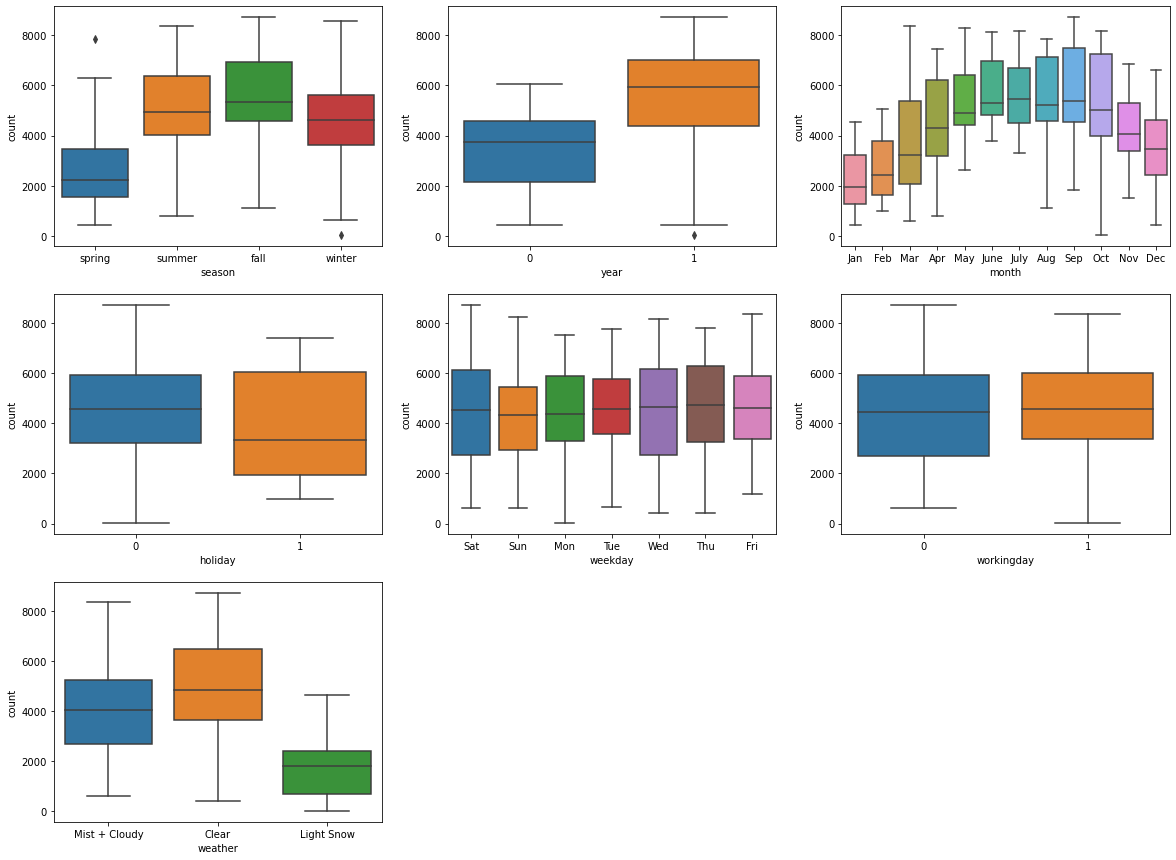

In [31]:
# Box plotting to see demand wrt Categorical variables

plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'count', data = boom_bikes_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'year', y = 'count', data = boom_bikes_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'month', y = 'count', data = boom_bikes_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'count', data = boom_bikes_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'count', data = boom_bikes_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'count', data = boom_bikes_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weather', y = 'count', data = boom_bikes_df)
plt.show()

## Regression plot to check linearity

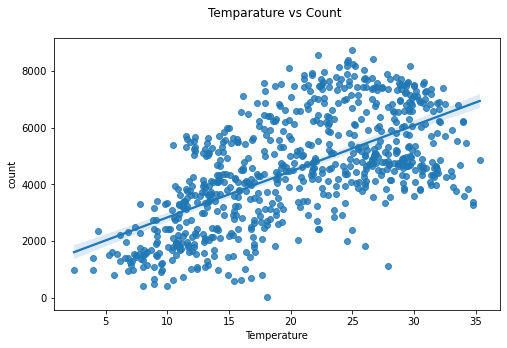

In [32]:
# regression plot temparature vs count

plt.figure(figsize=(8,5))
plt.title("Temparature vs Count \n")
sns.regplot(y="count", x="temp", data = boom_bikes_df)
plt.xlabel("Temperature")
plt.show()

### Interpreation

* There is linear relation between temparature and count

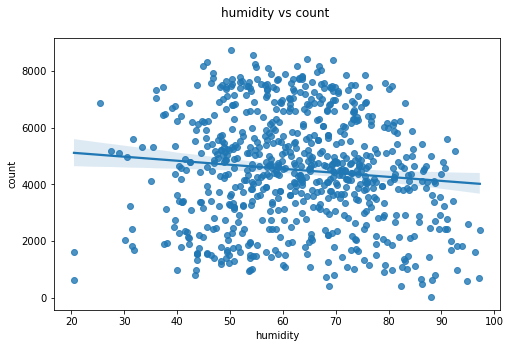

In [33]:
# regression plot humidity vs count

plt.figure(figsize=(8,5))
plt.title("humidity vs count \n")
sns.regplot(y="count", x="humidity", data = boom_bikes_df)
plt.xlabel("humidity")
plt.show()

### Interpretation -

* Count wrt humidity is scattered
* count decrease with the increase in humidity

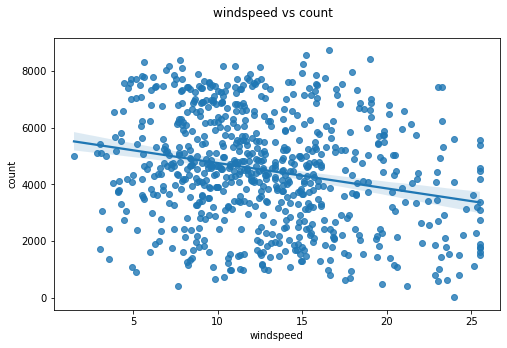

In [34]:
# regression plot windspeed vs count 

plt.figure(figsize=(8,5))
plt.title("windspeed vs count  \n")
sns.regplot(y="count", x="windspeed", data = boom_bikes_df)
plt.xlabel("windspeed")
plt.show()

### Interpretation -

* Count wrt windspeed is scattered
* count decrease with the increase in windspeed

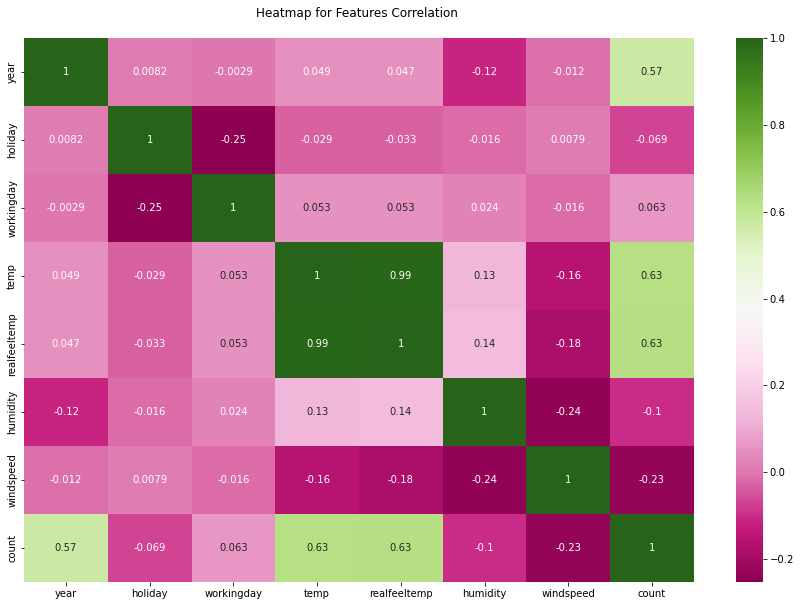

In [35]:
# Heatmap to check correlation

plt.figure(figsize=(15, 10))
sns.heatmap(boom_bikes_df.corr(), annot = True, cmap='PiYG')
plt.title("Heatmap for Features Correlation \n")
plt.show()

### Interpretation -

* `temp` is highly correlated with `realfeeltemp`

# Data Preparation

### Creating Dummy Variables for Months, Weekdays, Weathers and Seasons

In [36]:
# Dummy variables for months, weekdays, weathers andseasons

months_dummy = pd.get_dummies(boom_bikes_df.month, drop_first = True)
seasons_dummy = pd.get_dummies(boom_bikes_df.season, drop_first = True)
weekdays_dummy = pd.get_dummies(boom_bikes_df.weekday, drop_first = True)
weathers_dummy = pd.get_dummies(boom_bikes_df.weather, drop_first = True)

In [37]:
# Add dummy variables datasets to the original dataset

boom_bikes_df = pd.concat([months_dummy, weekdays_dummy, weathers_dummy, seasons_dummy, boom_bikes_df], axis = 1)

boom_bikes_df.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,month,holiday,weekday,workingday,weather,temp,realfeeltemp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [38]:
# Drop 'season', 'month', 'weekday', 'weather' as dummy variables explains these better

boom_bikes_df.drop(['month', 'season', 'weekday', 'weather'], axis = 1, inplace = True)

boom_bikes_df.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,summer,winter,year,holiday,workingday,temp,realfeeltemp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [39]:
boom_bikes_df.shape

(730, 30)

In [40]:

boom_bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Aug            730 non-null    uint8  
 1   Dec            730 non-null    uint8  
 2   Feb            730 non-null    uint8  
 3   Jan            730 non-null    uint8  
 4   July           730 non-null    uint8  
 5   June           730 non-null    uint8  
 6   Mar            730 non-null    uint8  
 7   May            730 non-null    uint8  
 8   Nov            730 non-null    uint8  
 9   Oct            730 non-null    uint8  
 10  Sep            730 non-null    uint8  
 11  Mon            730 non-null    uint8  
 12  Sat            730 non-null    uint8  
 13  Sun            730 non-null    uint8  
 14  Thu            730 non-null    uint8  
 15  Tue            730 non-null    uint8  
 16  Wed            730 non-null    uint8  
 17  Light Snow     730 non-null    uint8  
 18  Mist + Clo

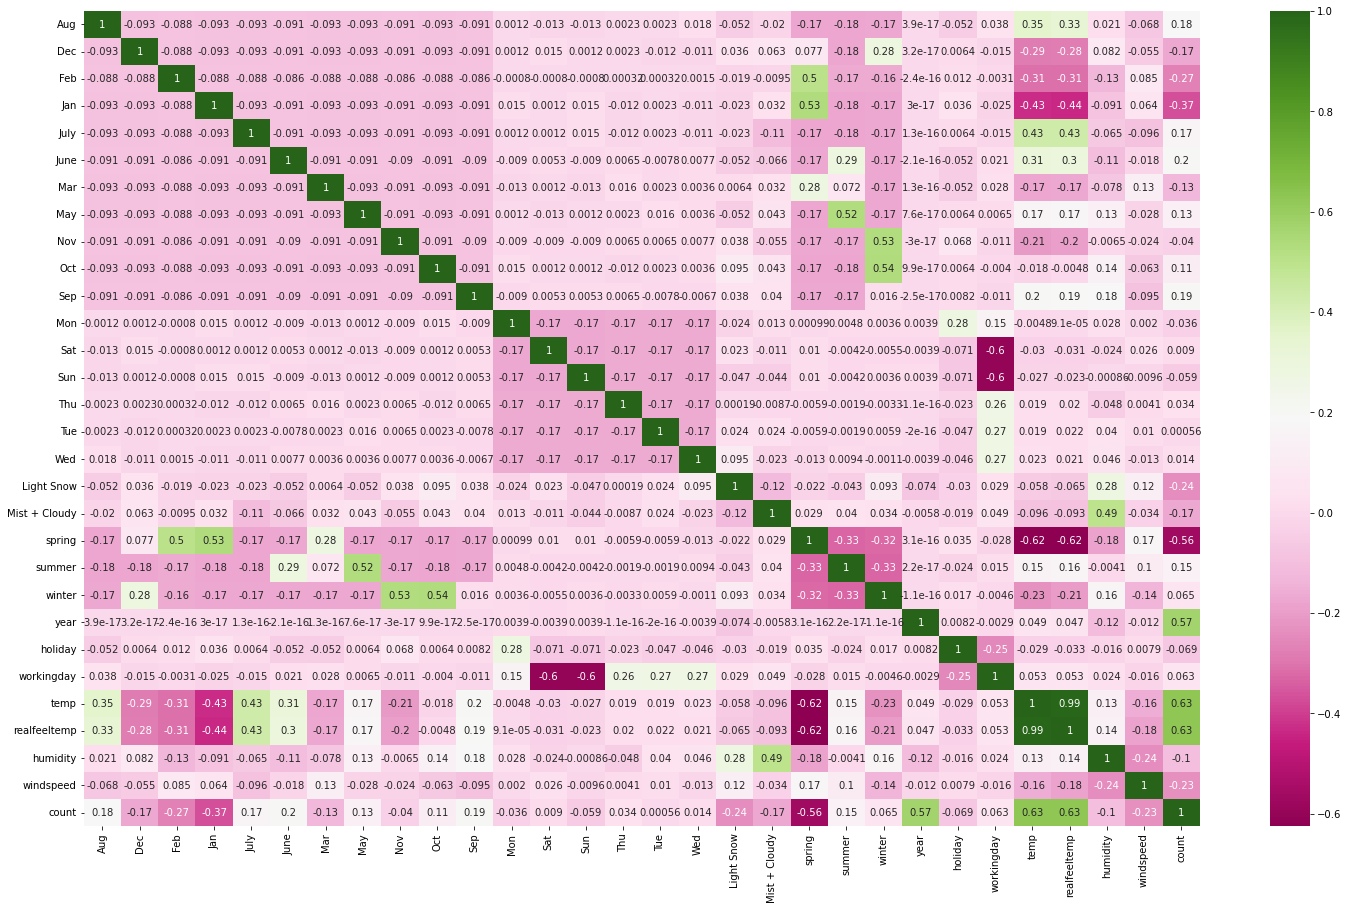

In [41]:
# Heatmap to check correlation between variables

plt.figure(figsize=(25, 15))
sns.heatmap(boom_bikes_df.corr(), annot = True, cmap='PiYG')
plt.show()

### Interpretation

* Since `temp` and `realfeeltemp` are highly correlated, so `realfeeltemp` can be dropped

In [42]:
boom_bikes_df.drop(['realfeeltemp'], axis = 1, inplace = True)
boom_bikes_df.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


# Model Building

In [43]:
# import necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Splitting the data into Training set and Testing set

In [44]:
# spliting data in to training set and testing set in to 70:30 ratio

df_train, df_test = train_test_split(boom_bikes_df, train_size = 0.7, random_state = 100)

In [45]:
df_train.shape

(510, 29)

In [46]:
df_test.shape

(220, 29)

### Feature rescaling by minmax scaler

In [47]:

scaler = MinMaxScaler()

# Applying scaler() to all the numerical colums in training data

numerical_vars = ['temp', 'humidity', 'windspeed', 'count']

# Fiting it on data

df_train[numerical_vars] = scaler.fit_transform(df_train[numerical_vars])
df_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.652079,0.363923,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.543728,0.351077,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0.245101,0.363506,0.911723,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.371673,0.259139,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0.345824,0.685292,0.523822,0.191095


In [48]:
df_train[numerical_vars].describe()

,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.557348,0.438893,0.513499
std,0.225858,0.182829,0.226881,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.414959,0.273856,0.356420
50%,0.542596,0.560879,0.408027,0.518638
75%,0.735215,0.689104,0.569834,0.684710
max,1.000000,1.000000,1.000000,1.000000


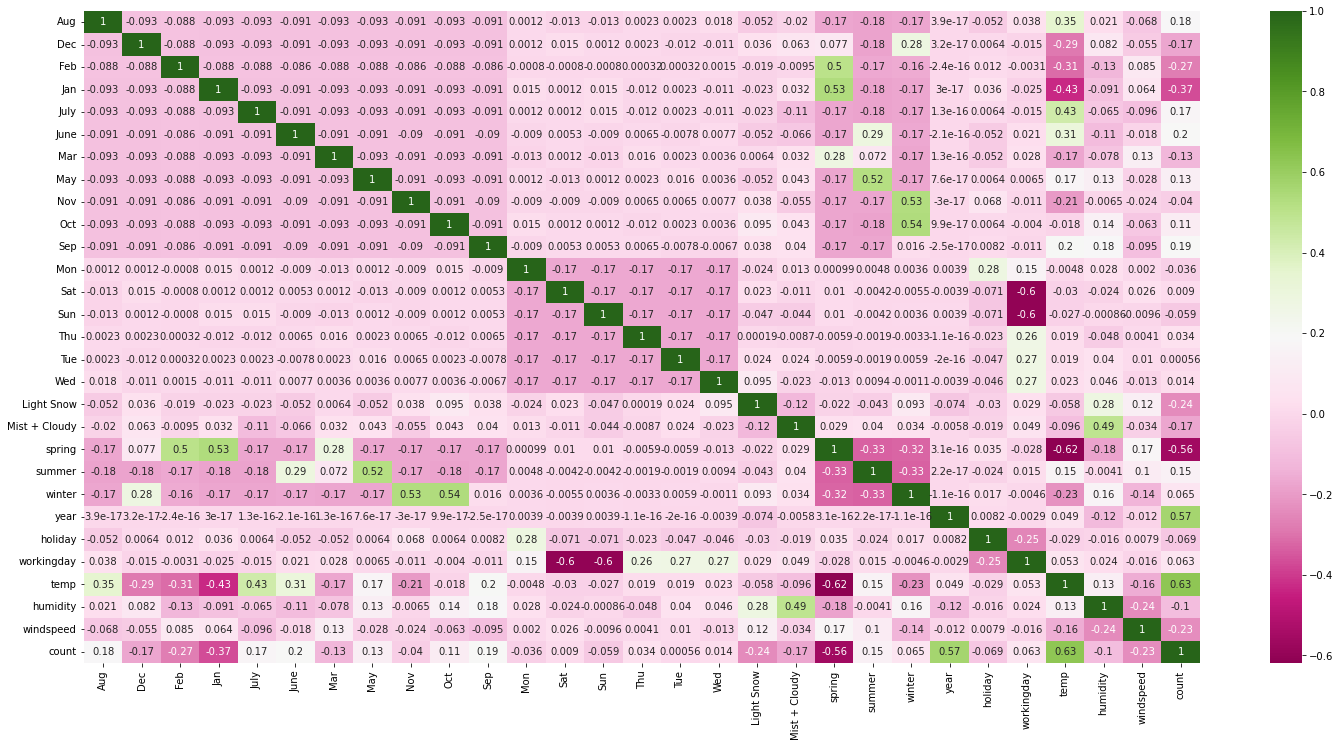

In [49]:
# Heatmap to check correlation between variables

plt.figure(figsize=(25, 12))
sns.heatmap(boom_bikes_df.corr(), annot = True, cmap='PiYG')
plt.show()

## Model Training

* I will build RFE model

* Assumptions -
 * There is linear relationship between x & y
 * Error terms are normally distributed, independent of each other and have contact variance

In [50]:
# Divide the tarining dataset into features and target variable

y_train = df_train.pop('count')
X_train = df_train

In [51]:
# Import necessary libraries for RFE and LinearRegression

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [52]:
# Making a Lienar Regression model

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [53]:
# using RFE for feature selection and Limiting number of feature selection to 15 features.

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [54]:
# Columns list selected by RFE and their weights

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Aug', False, 9),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 11),
 ('Tue', False, 8),
 ('Wed', False, 10),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [55]:
# listing features which are selected by RFE during selection
X_train.columns[rfe.support_]

Index(['July', 'Sep', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy', 'spring',
       'summer', 'winter', 'year', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [56]:
# listing features which are not selected by RFE during selection
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'Jan', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

### RFE Model 1

* Starting with all the variables selected by RFE (`rfe.support`)

In [57]:
# X_train dataframe from RFE selected variables

X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [58]:
# Constant variable addition

import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

X_train_rfe.head()

,const,July,Sep,Sat,Sun,Light Snow,Mist + Cloudy,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed
576,1.0,1,0,0,0,0,0,0,0,0,1,0,1,0.815169,0.652079,0.363923
426,1.0,0,0,1,0,0,1,1,0,0,1,0,0,0.442393,0.543728,0.351077
728,1.0,0,0,0,1,0,0,1,0,0,1,0,0,0.245101,0.363506,0.911723
482,1.0,0,0,1,0,0,1,0,1,0,1,0,0,0.395666,0.371673,0.259139
111,1.0,0,0,0,0,0,1,0,1,0,0,0,1,0.345824,0.685292,0.523822


In [59]:
# Running the linear model 

lm = sm.OLS(y_train, X_train_rfe).fit()

In [60]:
#summary of the model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.1
Date:                Wed, 11 May 2022   Prob (F-statistic):          3.92e-191
Time:                        20:18:54   Log-Likelihood:                 516.97
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     495   BIC:                            -940.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1741      0.025      6.940

### Interpretation

* R-squared: 0.847
* Adj. R-squared: 0.842

### VIF Calculation of the model

In [61]:
# VIF Calculation

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_rfe = X_train_rfe.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
11,workingday,41.20
2,Sat,10.07
3,Sun,9.68
6,spring,5.02
12,temp,3.64
8,winter,3.49
7,summer,2.62
10,holiday,2.55
13,humidity,1.97
5,Mist + Cloudy,1.60


#### `holiday` column can be dropped as it has high *p value* and low VIF

In [62]:
# Drop holiday column

X_train_v2 = X_train_rfe.drop(["holiday"], axis = 1)

In [63]:
# Add constant variable
X_train_v2 = sm.add_constant(X_train_v2)

# Create and fit a model
lm_v2 = sm.OLS(y_train, X_train_v2).fit()

# summary of the model
print(lm_v2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.1
Date:                Wed, 11 May 2022   Prob (F-statistic):          3.92e-191
Time:                        20:18:54   Log-Likelihood:                 516.97
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     495   BIC:                            -940.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1498      0.039      3.794

### VIF Calculation

In [64]:
X_train_v2 = X_train_v2.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_v2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
12,humidity,18.72
11,temp,17.20
10,workingday,17.07
13,windspeed,5.18
2,Sat,4.61
3,Sun,4.45
6,spring,4.39
8,winter,3.39
7,summer,2.94
5,Mist + Cloudy,2.42


#### Since all the p-values almost tends to 0, so now I will remove the feature having highest VIF i.e. `humidity` (VIF = 18.72)

In [65]:
# Dropping humidity

X_train_v3 = X_train_v2.drop(["humidity"], axis = 1)

In [66]:
# Add constant variable
X_train_v3 = sm.add_constant(X_train_v3)

# Create and fit a model
lm_v3 = sm.OLS(y_train, X_train_v3).fit()

# summary of the model
print(lm_v3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.7
Date:                Wed, 11 May 2022   Prob (F-statistic):          2.07e-188
Time:                        20:18:54   Log-Likelihood:                 507.71
No. Observations:                 510   AIC:                            -987.4
Df Residuals:                     496   BIC:                            -928.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1029      0.039      2.667

### VIF Calculation

In [67]:
# VIF Calculation

X_train_v3 = X_train_v3.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_v3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
10,workingday,16.23
11,temp,12.74
12,windspeed,4.91
2,Sat,4.45
3,Sun,4.22
6,spring,3.82
8,winter,2.78
7,summer,2.77
9,year,2.07
0,July,1.60


#### `workingday` has highest VIF value (16.23), so I am dropping this feature to check the effect

In [68]:
# Dropping workingday

X_train_v4 = X_train_v3.drop(["workingday"], axis = 1)

In [69]:
# Add constant variable
X_train_v4 = sm.add_constant(X_train_v4)

# Create and fit a model
lm_v4 = sm.OLS(y_train, X_train_v4).fit()

# summary of the model
print(lm_v4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.0
Date:                Wed, 11 May 2022   Prob (F-statistic):          3.08e-186
Time:                        20:18:54   Log-Likelihood:                 499.76
No. Observations:                 510   AIC:                            -973.5
Df Residuals:                     497   BIC:                            -918.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2021      0.030      6.789

### VIF Calculation

In [70]:
# VIF Calculation

X_train_v4 = X_train_v4.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_v4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
10,temp,5.21
11,windspeed,4.76
7,summer,2.25
6,spring,2.12
9,year,2.07
8,winter,1.82
0,July,1.59
5,Mist + Cloudy,1.55
1,Sep,1.33
2,Sat,1.22


#### Now, `sat` has high p-value (0.188) and low VIF, so dropping `sat` feature to see the effect

In [71]:
# Dropping sat

X_train_v5 = X_train_v4.drop(["Sat"], axis = 1)

In [72]:
# add constant
X_train_v5 = sm.add_constant(X_train_v5)

# Create and fit a model
lm_v5 = sm.OLS(y_train, X_train_v5).fit()

# summary of the model
print(lm_v5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.7
Date:                Wed, 11 May 2022   Prob (F-statistic):          4.70e-187
Time:                        20:18:54   Log-Likelihood:                 498.87
No. Observations:                 510   AIC:                            -973.7
Df Residuals:                     498   BIC:                            -922.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2051      0.030      6.906

### VIF Calculation

In [73]:
# VIF Calculation

X_train_v5 = X_train_v5.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_v5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
9,temp,5.17
10,windspeed,4.74
6,summer,2.25
5,spring,2.10
8,year,2.07
7,winter,1.80
0,July,1.59
4,Mist + Cloudy,1.55
1,Sep,1.33
2,Sun,1.17


#### Now, `july` has next highest p-value and low VIF, so dropping it

In [74]:
X_train_v6 = X_train_v5.drop(["July"], axis = 1)

In [75]:
#Add constant
X_train_v6 = sm.add_constant(X_train_v6)

# Create and fit a model
lm_v6 = sm.OLS(y_train, X_train_v6).fit()

# summary of the model
print(lm_v6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.1
Date:                Wed, 11 May 2022   Prob (F-statistic):          7.76e-187
Time:                        20:18:54   Log-Likelihood:                 495.50
No. Observations:                 510   AIC:                            -969.0
Df Residuals:                     499   BIC:                            -922.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1974      0.030      6.643

### Calculating VIF

In [76]:
X_train_v6 = X_train_v6.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_v6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
9,windspeed,4.73
8,temp,3.94
7,year,2.07
4,spring,2.00
5,summer,1.92
6,winter,1.64
3,Mist + Cloudy,1.55
0,Sep,1.22
1,Sun,1.17
2,Light Snow,1.08


#### Now, `spring` has highest p-value and low VIF, so I drop it to check the effect

In [77]:
X_train_v7 = X_train_v6.drop(["spring"], axis = 1)

In [78]:
# Add constant
X_train_v7 = sm.add_constant(X_train_v7)

# Create and fit a model
lm_v7 = sm.OLS(y_train, X_train_v7).fit()

# summary of the model
print(lm_v7.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     272.2
Date:                Wed, 11 May 2022   Prob (F-statistic):          2.26e-186
Time:                        20:18:54   Log-Likelihood:                 491.49
No. Observations:                 510   AIC:                            -963.0
Df Residuals:                     500   BIC:                            -920.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1286      0.017      7.600

### VIF Calculation

In [79]:
# Making a backup of X_train_v7 for later use
X_train_current = X_train_v7

#VIF Calculation

X_train_v7 = X_train_v7.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_v7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
7,temp,3.75
8,windspeed,3.14
6,year,2.00
4,summer,1.57
3,Mist + Cloudy,1.49
5,winter,1.38
0,Sep,1.20
1,Sun,1.16
2,Light Snow,1.08


#### Interpretation

* Now, VIF of all the features is < 4, so it should be accepted
* P value for all the features is 0
* R-squared: 0.830
* Adj. R-squared: 0.827

## Residual Analysis

* Now, it's time to check the reliability and credibility of the model.
* So, next I will validate the initial assumptions

### Normality

In [80]:
y_train_pred = lm_v7.predict(X_train_current)

C:\Users\atultiwari\miniconda3\envs\upgrad\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


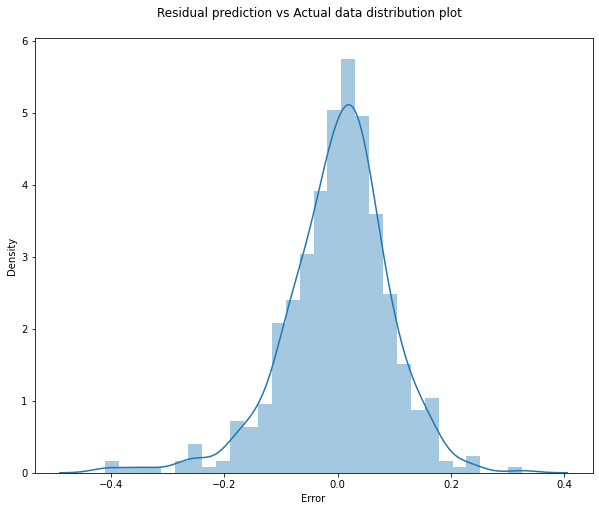

In [81]:
# Plotting a histogram of the error terms
res = y_train - y_train_pred

plt.figure(figsize = (10, 8))
sns.distplot(res)
plt.title('Residual prediction vs Actual data distribution plot  \n')
plt.xlabel('Error')
plt.show()

#### Since error terms are normally distributed and is centered about 0, it can be interpreted that - model has satisfied the assumption of normal distribution of error terms

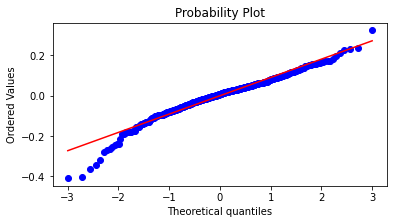

In [82]:
# Probability plot and QQ plot

fig, ax = plt.subplots(figsize=(6,3))
_, (__, ___, r) = sp.stats.probplot(res, plot=ax, fit=True)

plt.show()

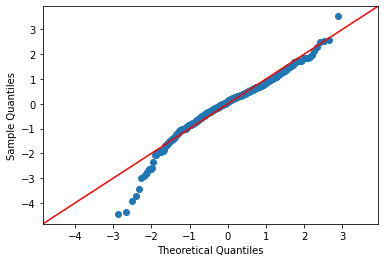

In [83]:
# QQ plot
sm.qqplot(res, fit=True, line='45')
plt.show()

#### Interpretation

* error terms are normally distributed
* model satisfied the assumption of normal distribution of error terms

### Homoscedasticity

C:\Users\atultiwari\miniconda3\envs\upgrad\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


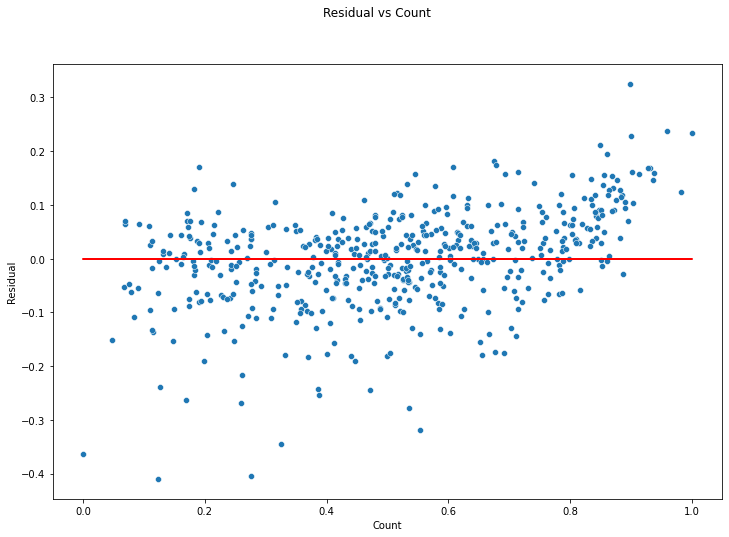

In [84]:
# plotting scatter plot residual vs count 

plt.figure(figsize = (12,8))
sns.scatterplot(y_train, res)
plt.plot(y_train, [0]*len(y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.suptitle('Residual vs Count')
plt.show()

C:\Users\atultiwari\miniconda3\envs\upgrad\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


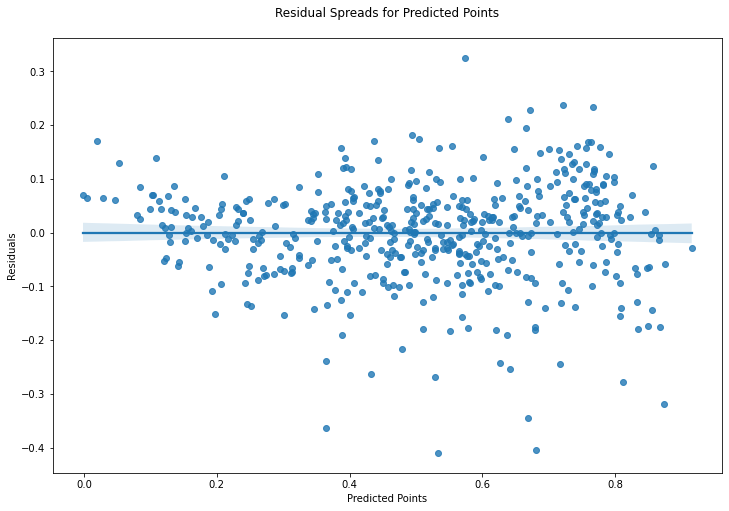

In [85]:
# Checking patterns in residuals spreads for predicted points.

plt.figure(figsize = (12,8))

sns.regplot(y_train_pred, res)
plt.title('Residual Spreads for Predicted Points\n')
plt.xlabel('Predicted Points')
plt.ylabel('Residuals')
plt.show()

#### Interpretation

* There is constatnt deviation from the zero line
* Assumption of Homoscandasticity is valid and true

C:\Users\atultiwari\miniconda3\envs\upgrad\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


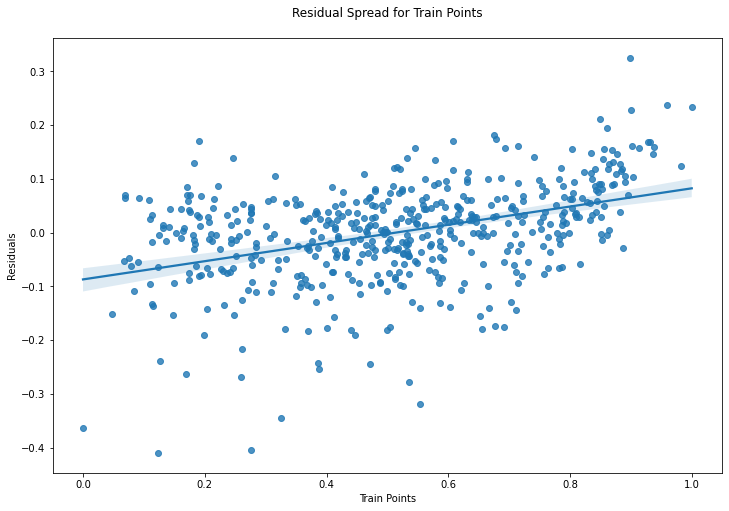

In [86]:
# checking patterns in residuals for Train Points
plt.figure(figsize = (12,8))
sns.regplot(y_train, res)
plt.title('Residual Spread for Train Points\n')
plt.xlabel('Train Points')
plt.ylabel('Residuals')
plt.show()

#### Interpretation

* No pattern identified in above plot, so it can be concluded that the second assumption of Homoscedasticity is verified

### Auto-correlation assumption

C:\Users\atultiwari\AppData\Local\Temp\ipykernel_6608\1296984561.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


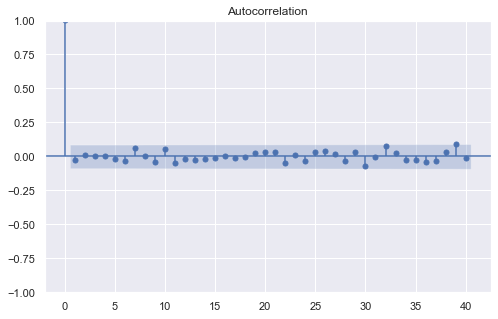

In [87]:
sns.set(rc={'figure.figsize':(8,5)})
acf = smt.graphics.plot_acf(res, lags=40 , alpha=0.05)
acf.show()

#### Interpretation

* No pattern in the error
* no auto-correlation, ie, error term of one observation is not influenced by error term of another observation

# Making Predictions

In [88]:
# Make a list of numeric variables

numerical_vars = ['temp', 'humidity', 'windspeed', 'count']

# Fit it on the data

df_test[numerical_vars] = scaler.transform(df_test[numerical_vars])
df_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0.831783,0.565508,0.115794,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0.901354,0.505614,0.211364,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0.511964,0.794188,0.459509,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.881625,0.286191,0.466884,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0.817246,0.130470,0.738905,0.569029


In [89]:
# Validate the data to check scaling
df_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.254545,0.263636,0.236364,0.481818,0.036364,0.700000,0.558718,0.541232,0.429795,0.522154
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.436599,0.441609,0.425817,0.500809,0.187620,0.459303,0.233187,0.188557,0.216662,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.064044,-0.058858,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.402981,0.273395,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.525216,0.412652,0.524678
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.675113,0.553709,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002722,1.000000,0.963300


#### Divide into X_test and y_test

In [90]:
# Dividing the testing dataset into features and target variable
y_test = df_test.pop('count')
X_test = df_test

In [91]:
X_train_v7.columns

Index(['Sep', 'Sun', 'Light Snow', 'Mist + Cloudy', 'summer', 'winter', 'year',
       'temp', 'windspeed'],
      dtype='object')

In [92]:
X_test_part = X_test[X_train_v7.columns]

X_test_part = sm.add_constant(X_test_part)

X_test_part.head()

,const,Sep,Sun,Light Snow,Mist + Cloudy,summer,winter,year,temp,windspeed
184,1.0,0,0,0,1,0,0,0,0.831783,0.115794
535,1.0,0,0,0,0,1,0,1,0.901354,0.211364
299,1.0,0,0,0,1,0,1,0,0.511964,0.459509
221,1.0,0,0,0,0,0,0,0,0.881625,0.466884
152,1.0,0,0,0,0,1,0,0,0.817246,0.738905


In [93]:
# Prediction for testing data

y_test_pred = lm_v7.predict(X_test_part)

# Model Evaluation

C:\Users\atultiwari\miniconda3\envs\upgrad\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


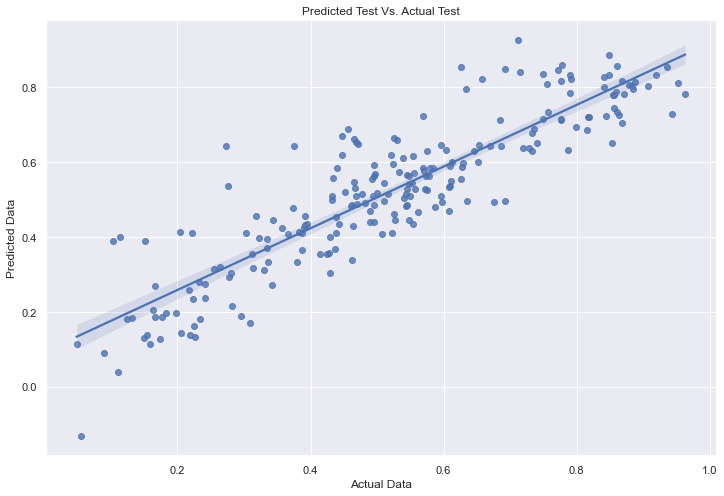

In [94]:
# Plotting y_test and y_pred to understand the spread
plt.figure(figsize = (12,8))
sns.regplot(y_test, y_test_pred)
plt.title('Predicted Test Vs. Actual Test')
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.show()

#### Interpretation

* From the above plot, it is seen that actual and predicted test points are linear
* So it can be concluded that the model is working fine

In [95]:
# Model Evaluation

#importing libraries - MSE and R square

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [96]:
# Getting mean square error value

np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_test_pred))

0.09962290708005182

In [97]:
# R squared value for test data

r2_score(y_test, y_test_pred)

0.7924318066210488

In [98]:
# Adjusted R^2

# Adjusted R^2 = 1-(1-R^2)*(n-1)/(n-p-1))
# where, n = sample size , p = number of independent variables

adj_r2 = 1-((1-0.792431806621049)*(220-1)/(220-10-1))

print(adj_r2)

0.7825003141148791


### Interpretation -

* Since the difference between R square of train and test data is less than 5, the model should be perfect

In [99]:
# significant features from final model

round(lm_v7.params,4)

const            0.1286
Sep              0.0960
Sun             -0.0463
Light Snow      -0.2827
Mist + Cloudy   -0.0782
summer           0.0897
winter           0.1299
year             0.2330
temp             0.5525
windspeed       -0.1148
dtype: float64

## Equation for best fitted line

count = 0.1286 + (0.0960 * Sep) - (0.0463 * Sun) - (0.2827 * (light snow)) - (0.0782 * (Mist + Cloudy)) + (0.0897 * summer) + (0.1299 * winter) + (0.2330 * year) + (0.5525 * temp) - (0.1148 * windspeed)